For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.


In [ ]:
#1 importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [2]:
cf.go_offline()

In [3]:
#2 getting data
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#3 exploratory data analysis

(0.0, 900.0)

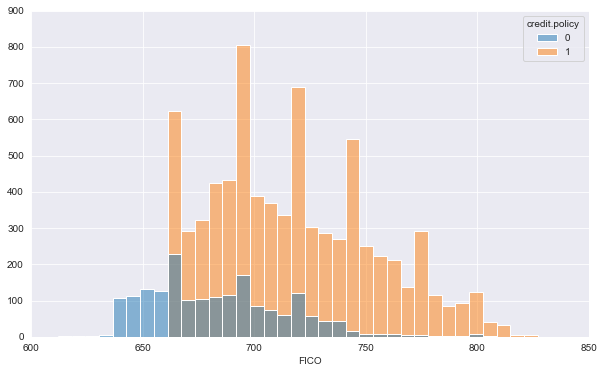

In [105]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

sns.histplot(df,x='fico',kde=False,bins=35,hue='credit.policy')
plt.xlabel('FICO')
plt.ylabel('')
plt.xlim(600,850)
plt.ylim(0,900)

(0.0, 900.0)

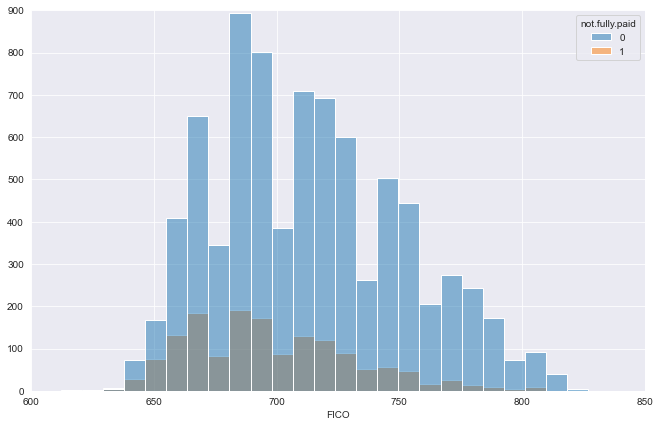

In [46]:
plt.figure(figsize=(11,7))
sns.histplot(df,x='fico',kde=False,bins=25,hue='not.fully.paid')
plt.xlabel('FICO')
plt.ylabel('')
plt.xlim(600,850)
plt.ylim(0,900)

<AxesSubplot:xlabel='purpose', ylabel='count'>

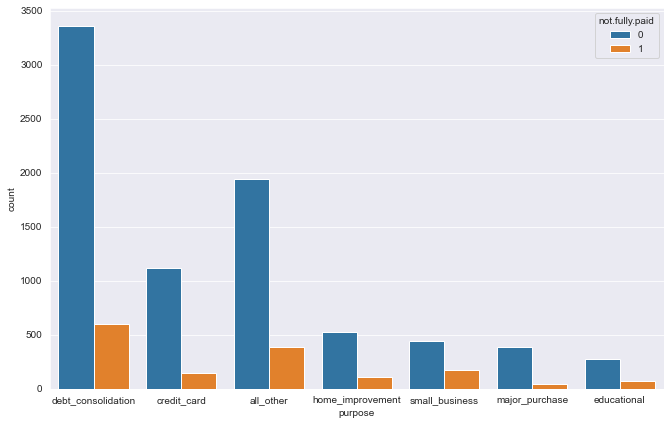

In [47]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

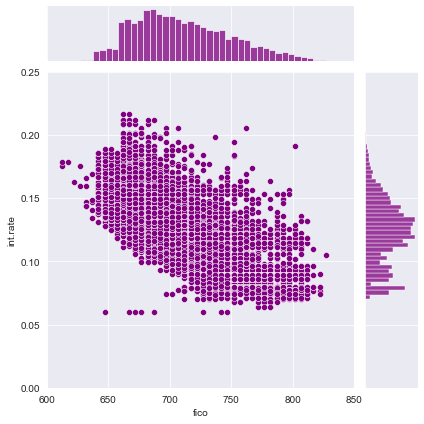

In [49]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple',ylim=(0,0.25),xlim=(600,850))

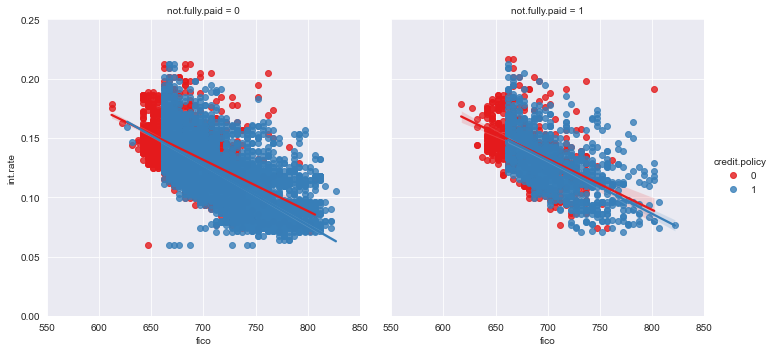

In [107]:
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

plt.ylim(0,0.25)
plt.xlim(550,850)
plt.subplots_adjust(wspace=0.1)

In [61]:
#4 setting up data for random forrest classification method

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [63]:
#purpose col is categorical so that mean thet we have to transform it and
#to do this i will use dummies

In [109]:
cat_feats = ['purpose']

In [110]:
final_data=pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [111]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [112]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [84]:
#5 splitting the data and training the decision tree model

In [85]:
from sklearn.model_selection import train_test_split

In [114]:
X=final_data.drop('not.fully.paid',axis=1,)
y=df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [115]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
4845,1,0.1426,548.90,10.714418,14.67,682,3959.958333,9092,23.2,0,0,0,0,1,0,0,0,0
6910,1,0.0774,312.19,10.819778,0.86,772,5190.041667,2232,6.5,0,0,0,0,0,0,0,0,0
8146,0,0.1520,208.59,10.491274,18.53,642,3270.000000,6970,76.6,4,1,0,0,1,0,0,0,0
7113,1,0.1385,511.56,10.950807,12.74,682,3420.041667,21113,72.6,2,0,0,0,0,0,0,0,0
195,1,0.1059,130.18,11.034890,17.81,682,6330.041667,18168,68.5,2,0,0,1,0,0,0,0,0


In [116]:
X_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
5244,1,0.1287,274.12,10.933107,23.57,687,5100.000000,11508,51.8,0,0,0,0,1,0,0,0,0
1739,1,0.1347,805.67,11.695247,24.50,712,6420.041667,81833,84.6,0,0,0,1,0,0,0,0,0
2780,1,0.0768,124.77,10.545341,13.45,802,4560.000000,3199,7.4,0,0,0,0,1,0,0,0,0
7062,1,0.1099,274.98,10.858999,18.62,702,4940.041667,9222,34.7,3,0,1,0,1,0,0,0,0
6661,1,0.1913,550.81,11.736069,9.96,687,4561.041667,12730,95.0,1,0,0,0,0,0,0,0,1


In [117]:
y_train.value_counts()

0    5614
1    1090
Name: not.fully.paid, dtype: int64

In [118]:
y_test.value_counts()

0    2431
1     443
Name: not.fully.paid, dtype: int64

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dtree = DecisionTreeClassifier()

In [121]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [122]:
predictions = dtree.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix,classification_report

In [124]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1994  437]
 [ 347   96]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [125]:
#6 training random forest model

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rfc = RandomForestClassifier(n_estimators=300)

In [132]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [133]:
rfc_pred=rfc.predict(X_test)

In [134]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.44      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.85      0.78      2874

[[2422    9]
 [ 436    7]]
